In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from operator import add
#import matplotlib.pyplot as plt
personinfo = pd.DataFrame(pd.read_csv((r"logs/all_together.csv")))
actionvalues = pd.DataFrame(pd.read_csv((r"action_values.csv")))
personality_action_difference_dict = {}
print(personinfo)

      Unnamed: 0  run_number  round_number  turn_number         _action_name  \
0              0           0             0            0          leaves_room   
1              1           0             0            1     stands_in_corner   
2              2           0             0            2          leaves_room   
3              3           0             0            3  starts_conversation   
4              4           0             0            4          leaves_room   
...          ...         ...           ...          ...                  ...   
3195        3195           9             9          315                yawns   
3196        3196           9             9          316                rants   
3197        3197           9             9          317               shares   
3198        3198           9             9          318               shouts   
3199        3199           9             9          319        shows_concern   

     person_before_action_name person_b

In [2]:
def set_up(personinfo):
    action_history = personinfo.loc[:,'_action_name']
    person_action_history = personinfo.loc[:,'person_before_action_name']
    personactionlist = []
    count = 0
    #df = df[((df['A'] > 0) & (df['B'] > 0)) | ((df['A'] < 0) & (df['B'] < 0))]
    for person in person_action_history:
        #if count < 10:
            persondetails = pd.DataFrame(personinfo.loc[(personinfo['person_before_action_name'] == person) | (personinfo['person_after_action_conversation_partner'] == person)])
            #editeddetails = persondetails[['person_before_action_name', 'person_before_action_emotional_state', 'person_before_action_location_state']]
            persondetails.to_csv('personlogs/' + person + '_testing.csv')
            personactionlist.append(persondetails)
        #count += 1
    
    return person_action_history
    
person_list = set_up(personinfo=personinfo)
print(person_list)    

0           Robin
1         Patrick
2          Ronnie
3       Jacquelyn
4         Phyllis
          ...    
3195         John
3196        Brian
3197        James
3198     Mauricio
3199      Lillian
Name: person_before_action_name, Length: 3200, dtype: object


In [3]:
def freq_dist(action_history):
    freq_dict = {}
    for action in action_history: #frequency distribution of person's actions
        if action in freq_dict:
            freq_dict[action] += 1
        else:
            freq_dict[action] = 1
    return freq_dict

def plot_freq_dist(freq_dict , name):
        X = np.arange(len(freq_dict))
        plt.bar(range(len(freq_dict)), list(freq_dict.values()), width=0.2, align='center')
        #plt.bar(X-0.2, low_action_dist.values(), width=0.2, color='g', align='center')
        plt.xticks(range(len(freq_dict)), list(freq_dict.keys()))
        plt.rcParams.update({'font.size': 10})
        plt.title(name)
        plt.ylabel('Count')
        plt.xlabel('Actions')
        
        
        #colors = {'high':'blue', 'low':'green'}         
        #labels = list(colors.keys())
        #handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
        ##plt.legend(handles, labels)
        plt.gcf().autofmt_xdate()
        
        filepath = 'freqdistgraphs/' + name + '.png'
        plt.savefig(filepath, bbox_inches="tight")
        plt.show()
    

In [4]:
def conv_mean(action_history):
    count = 0
    inConv = False
    convtot = []
    for action in action_history: #gets mean length of conversation
        if action == 'starts_conversation':
            count = 1
            inConv = True
        elif action == 'leaves_conversation':
            convtot.append(count)
            inConv = False
        elif inConv:
            count += 1
    if len(convtot):
        avgconv = sum(convtot) / len(convtot)
    else:
        avgconv = 0
    return avgconv


mean convo length for Robin  :  14.75


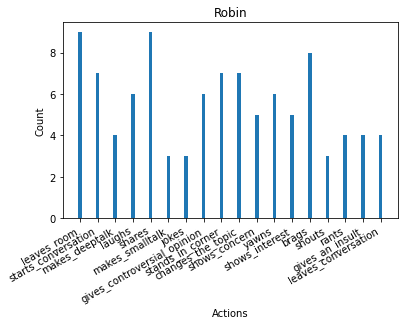

freq distribution {'leaves_room': 9, 'starts_conversation': 7, 'makes_deeptalk': 4, 'laughs': 6, 'shares': 9, 'makes_smalltalk': 3, 'jokes': 3, 'gives_controversial_opinion': 6, 'stands_in_corner': 7, 'changes_the_topic': 7, 'shows_concern': 5, 'yawns': 6, 'shows_interest': 5, 'brags': 8, 'shouts': 3, 'rants': 4, 'gives_an_insult': 4, 'leaves_conversation': 4}
TOTAL IS: [28, -13, 36, -21, -29]
average:  [0.28, -0.13, 0.36, -0.21, -0.29]
mean convo length for Patrick  :  5.333333333333333


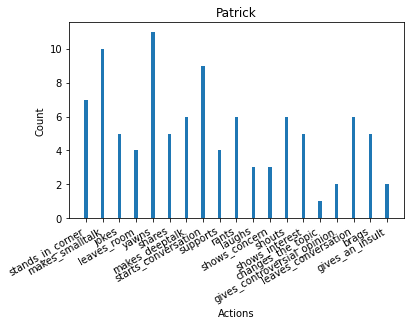

freq distribution {'stands_in_corner': 7, 'makes_smalltalk': 10, 'jokes': 5, 'leaves_room': 4, 'yawns': 11, 'shares': 5, 'makes_deeptalk': 6, 'starts_conversation': 9, 'supports': 4, 'rants': 6, 'laughs': 3, 'shows_concern': 3, 'shouts': 6, 'shows_interest': 5, 'changes_the_topic': 1, 'gives_controversial_opinion': 2, 'leaves_conversation': 6, 'brags': 5, 'gives_an_insult': 2}
TOTAL IS: [9, -3, 45, -2, -18]
average:  [0.09, -0.03, 0.45, -0.02, -0.18]
mean convo length for Ronnie  :  3.0


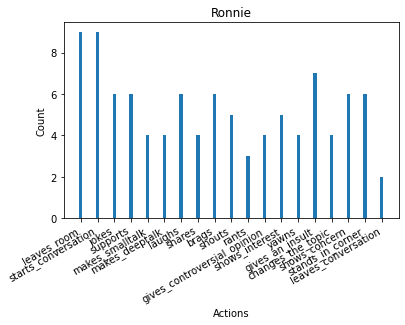

freq distribution {'leaves_room': 9, 'starts_conversation': 9, 'jokes': 6, 'supports': 6, 'makes_smalltalk': 4, 'makes_deeptalk': 4, 'laughs': 6, 'shares': 4, 'brags': 6, 'shouts': 5, 'rants': 3, 'gives_controversial_opinion': 4, 'shows_interest': 5, 'yawns': 4, 'gives_an_insult': 7, 'changes_the_topic': 4, 'shows_concern': 6, 'stands_in_corner': 6, 'leaves_conversation': 2}
TOTAL IS: [17, -8, 43, -3, -23]
average:  [0.17, -0.08, 0.43, -0.03, -0.23]
mean convo length for Jacquelyn  :  2.4285714285714284


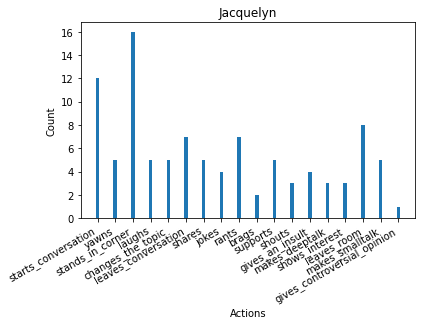

freq distribution {'starts_conversation': 12, 'yawns': 5, 'stands_in_corner': 16, 'laughs': 5, 'changes_the_topic': 5, 'leaves_conversation': 7, 'shares': 5, 'jokes': 4, 'rants': 7, 'brags': 2, 'supports': 5, 'shouts': 3, 'gives_an_insult': 4, 'makes_deeptalk': 3, 'shows_interest': 3, 'leaves_room': 8, 'makes_smalltalk': 5, 'gives_controversial_opinion': 1}
TOTAL IS: [12, -6, 24, -24, -10]
average:  [0.12, -0.06, 0.24, -0.24, -0.1]
mean convo length for Phyllis  :  9.5


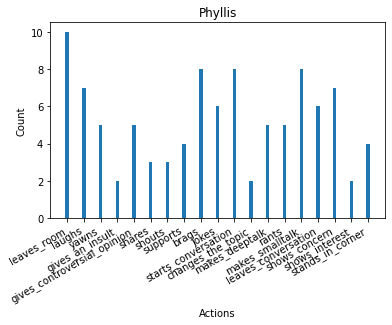

freq distribution {'leaves_room': 10, 'laughs': 7, 'yawns': 5, 'gives_an_insult': 2, 'gives_controversial_opinion': 5, 'shares': 3, 'shouts': 3, 'supports': 4, 'brags': 8, 'jokes': 6, 'starts_conversation': 8, 'changes_the_topic': 2, 'makes_deeptalk': 5, 'rants': 5, 'makes_smalltalk': 8, 'leaves_conversation': 6, 'shows_concern': 7, 'shows_interest': 2, 'stands_in_corner': 4}
TOTAL IS: [9, -7, 45, -7, -23]
average:  [0.09, -0.07, 0.45, -0.07, -0.23]
mean convo length for Agnes  :  3.0


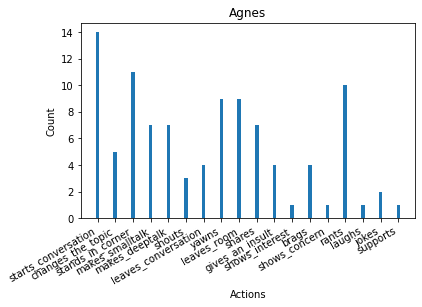

freq distribution {'starts_conversation': 14, 'changes_the_topic': 5, 'stands_in_corner': 11, 'makes_smalltalk': 7, 'makes_deeptalk': 7, 'shouts': 3, 'leaves_conversation': 4, 'yawns': 9, 'leaves_room': 9, 'shares': 7, 'gives_an_insult': 4, 'shows_interest': 1, 'brags': 4, 'shows_concern': 1, 'rants': 10, 'laughs': 1, 'jokes': 2, 'supports': 1}
TOTAL IS: [13, -5, 40, -24, -16]
average:  [0.13, -0.05, 0.4, -0.24, -0.16]
mean convo length for Dorothy  :  4.0


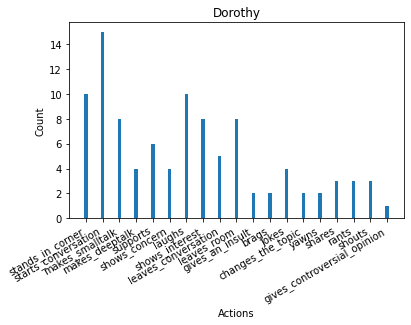

freq distribution {'stands_in_corner': 10, 'starts_conversation': 15, 'makes_smalltalk': 8, 'makes_deeptalk': 4, 'supports': 6, 'shows_concern': 4, 'laughs': 10, 'shows_interest': 8, 'leaves_conversation': 5, 'leaves_room': 8, 'gives_an_insult': 2, 'brags': 2, 'jokes': 4, 'changes_the_topic': 2, 'yawns': 2, 'shares': 3, 'rants': 3, 'shouts': 3, 'gives_controversial_opinion': 1}
TOTAL IS: [10, -3, 34, 6, -19]
average:  [0.1, -0.03, 0.34, 0.06, -0.19]
mean convo length for Shawn  :  10.142857142857142


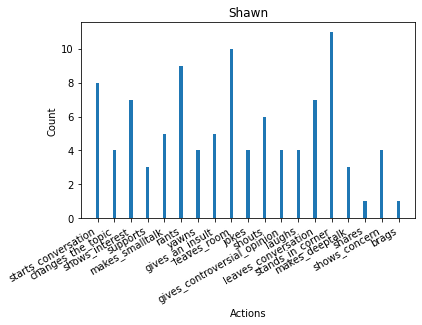

freq distribution {'starts_conversation': 8, 'changes_the_topic': 4, 'shows_interest': 7, 'supports': 3, 'makes_smalltalk': 5, 'rants': 9, 'yawns': 4, 'gives_an_insult': 5, 'leaves_room': 10, 'jokes': 4, 'shouts': 6, 'gives_controversial_opinion': 4, 'laughs': 4, 'leaves_conversation': 7, 'stands_in_corner': 11, 'makes_deeptalk': 3, 'shares': 1, 'shows_concern': 4, 'brags': 1}
TOTAL IS: [14, -8, 26, -24, -5]
average:  [0.14, -0.08, 0.26, -0.24, -0.05]
mean convo length for David  :  5.2


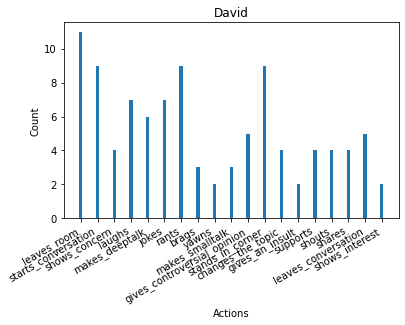

freq distribution {'leaves_room': 11, 'starts_conversation': 9, 'shows_concern': 4, 'laughs': 7, 'makes_deeptalk': 6, 'jokes': 7, 'rants': 9, 'brags': 3, 'yawns': 2, 'makes_smalltalk': 3, 'gives_controversial_opinion': 5, 'stands_in_corner': 9, 'changes_the_topic': 4, 'gives_an_insult': 2, 'supports': 4, 'shouts': 4, 'shares': 4, 'leaves_conversation': 5, 'shows_interest': 2}
TOTAL IS: [18, -9, 40, -19, -23]
average:  [0.18, -0.09, 0.4, -0.19, -0.23]
mean convo length for Malcolm  :  4.6


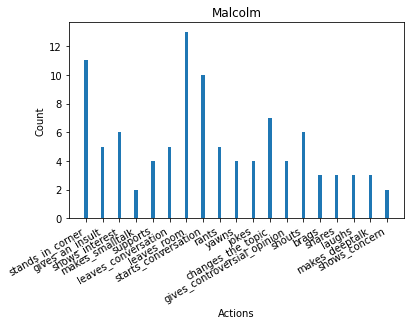

freq distribution {'stands_in_corner': 11, 'gives_an_insult': 5, 'shows_interest': 6, 'makes_smalltalk': 2, 'supports': 4, 'leaves_conversation': 5, 'leaves_room': 13, 'starts_conversation': 10, 'rants': 5, 'yawns': 4, 'jokes': 4, 'changes_the_topic': 7, 'gives_controversial_opinion': 4, 'shouts': 6, 'brags': 3, 'shares': 3, 'laughs': 3, 'makes_deeptalk': 3, 'shows_concern': 2}
TOTAL IS: [21, -11, 28, -24, -17]
average:  [0.21, -0.11, 0.28, -0.24, -0.17]

Key        Label          
Robin        [1.28, 0.87, 1.36, 0.79, 0.71]
Patrick        [1.09, 0.97, 1.45, 0.98, 1.18]
Ronnie        [1.17, 0.92, 1.43, 1.03, 0.77]
Jacquelyn        [1.12, 0.94, 1.24, 1.24, 1.1]
Phyllis        [1.09, 0.93, 0.55, 0.93, 0.77]
Agnes        [1.13, 0.95, 0.6, 0.76, 1.16]
Dorothy        [1.1, 0.97, 0.66, 0.94, 0.81]
Shawn        [1.14, 0.92, 0.74, 1.24, 1.05]
David        [1.18, 1.09, 1.4, 0.81, 0.77]
Malcolm        [1.21, 1.11, 1.28, 0.76, 1.17]


In [5]:
count = 0
for x in person_list:   #gets the difference between personality and mean action vector
    #if count < 10:
        tot = [0,0,0,0,0]
        filepath = "personlogs/" + x + "_testing.csv"
        individualinfo = pd.DataFrame(pd.read_csv((filepath)))
        indiactioninfo = pd.DataFrame(individualinfo.loc[individualinfo['person_before_action_name'] == x])
        indi_action_history = indiactioninfo.loc[:,'_action_name']
        basepersonality = indiactioninfo.loc[:,'person_before_action_personality_vector']
        baseplist = []
        item = basepersonality.iloc(0)[0]
        split_item = item[1:-1].split(" ")
        baseplist = []
        for item in split_item:
            if item != ' ' and item != '':
                baseplist.append(item)
    
        action_length = conv_mean(indi_action_history)                #finds the mean conversation length per person
        print("mean convo length for", x, " : ", str(action_length))
        freq_distribution = freq_dist(indi_action_history)             #finds the frequency distribution of actions per person
        plot_freq_dist(freq_distribution, x)
        print("freq distribution", freq_distribution)
        intcount = 0
        for action in indi_action_history:
            mapped_actions = pd.DataFrame(actionvalues.loc[actionvalues['action_name'] == action])
            #print(mapped_actions)
            #print('------------------------------------')
            for item in (mapped_actions.loc[:,'most_likely_personality_vector_OCEAN']):
                intlist = json.loads(item)
                tot = list(map(add, intlist, tot))
            
            intcount += 1
        print('TOTAL IS:', tot)
        avg_vector = []
        for item in tot:
            avg_vector.append(round(item/intcount,2))
        print("average: ", avg_vector)
        #difference_1 = set(list_1).difference(set(list_2))
        difvector = []
        for index in range(len(avg_vector)):
            item = float(avg_vector[index])
            item2 = float(baseplist[index])
            diff = round(abs(item - item2),2)
            difvector.append(diff)
        
        personality_action_difference_dict[x] = difvector
        indi_action_history.to_csv('personlogstesting/' + x + '_testing.csv')
    #count += 1
    
    #action_log = x[2]
    #personality = x[1]
    #mlv = action_log[:,2] 
    #action_avg = np.mean(mlv, axis = 0)   #averages most likely vector of each action
    #action_diff.append(np.subtract(personality - action_avg))
#print(action_diff) 

print("\n{:<10} {:<15}".format('Key','Label'))
for k in personality_action_difference_dict.keys():
    item = personality_action_difference_dict[k]
    print(k,"      ", item)
    

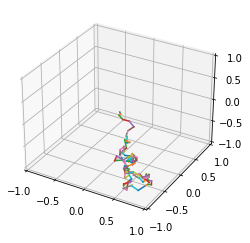

In [6]:
signs = [-1, 1]
magnitudes = [mag / 100 for mag in range(1,10)]

num_dimensions = 3
num_change_vectors = 100

example_vectors = np.array([[np.random.choice(magnitudes) * np.random.choice(signs) for _ in range(num_dimensions)] for _ in range(num_change_vectors)])

# Obsolete matplotlib method (second method is better)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.axes.set_xlim3d(-1, 1)
ax.axes.set_ylim3d(-1, 1)
ax.axes.set_zlim3d(-1, 1)

prev_pos = np.array([0,0,0])
#Plot the change vectors
for example_vector in example_vectors:
    x1,y1,z1 = prev_pos
    new_pos = prev_pos + example_vector
    x2,y2,z2 = new_pos
    ax.plot((x1,x2),(y1,y2),(z1,z2))
    prev_pos = new_pos

In [7]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

rs = np.random.RandomState()
rs.seed(0)

In [8]:
def plot_3D_positions(positions):
    x, y, z = positions
    
    index = np.array([x for x in range(10)])

    fig = go.Figure(data=[go.Scatter3d(
        x=x, y=y, z=z,
        marker=dict(
            size=4,
            colorscale='Viridis',
        ),
        line=dict(
            color=index,
            width=2
        ))])

    fig.update_layout(
        width=800,
        height=700,
        autosize=False,
        scene=dict(
            xaxis_title="Pleasure",
            yaxis_title="Arousal",
            zaxis_title="Dominance",
            xaxis = dict(nticks=4, range=[-1,1],),
            yaxis = dict(nticks=4, range=[-1,1],),
            zaxis = dict(nticks=4, range=[-1,1],),
            camera=dict(
                up=dict(
                    x=0,
                    y=0,
                    z=1
                ),
                eye=dict(
                    x=0,
                    y=1.0707,
                    z=1,
                )
            ),
            aspectratio = dict( x=1, y=1, z=0.7 ),
            aspectmode = 'manual'
        ),
    )
    
    return fig

person_list = set(person_list)
for x in person_list:
    filepath = "personlogs/" + x + "_testing.csv"
    individualinfo = pd.DataFrame(pd.read_csv((filepath)))
    indiactioninfo = pd.DataFrame(individualinfo.loc[individualinfo['person_before_action_name'] == x])
    firstruninfo = pd.DataFrame(indiactioninfo.loc[indiactioninfo['run_number'] == 0])
    indi_action_history = firstruninfo.loc[:,'person_after_action_emotional_state']
    pleasure_scale = []
    arousal_scale = []
    dominance_scale = []
    for item in indi_action_history:
        split_item = item[1:-1].split(" ")
        split_item = list(filter(None, split_item))
        pleasure_scale.append(float(split_item[0]))
        arousal_scale.append(float(split_item[1])) 
        dominance_scale.append(float(split_item[2])) 
    print("Length", len(pleasure_scale))
    emotional_positions = np.vstack((pleasure_scale,arousal_scale,dominance_scale))
    figure = plot_3D_positions(emotional_positions)
    filepathgraph = "personalitygraphs/" + x +".html"
    print
    figure.write_html(filepathgraph)
    #break



Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10
Length 10


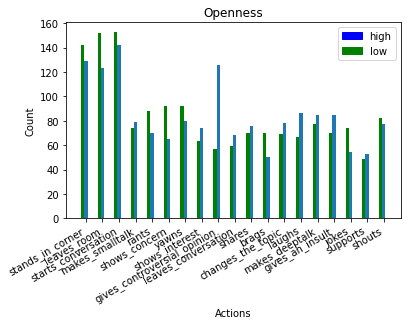

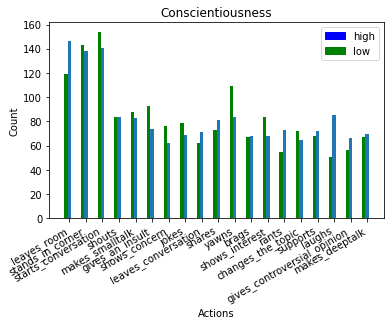

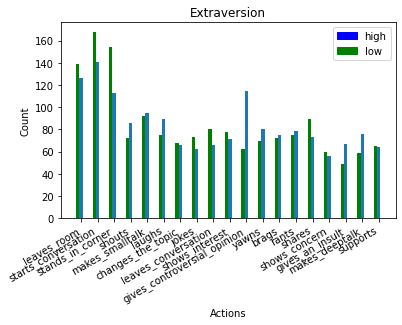

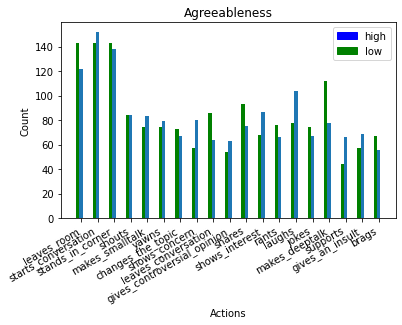

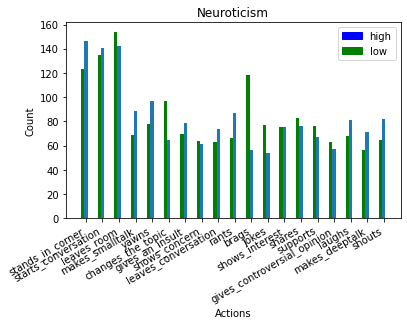

In [9]:
indipersonalityinfo = personinfo.loc[:,'person_before_action_personality_vector']

indi_action_history = personinfo.loc[:,'_action_name']
combined_personality_action = pd.concat([indipersonalityinfo,indi_action_history],axis=1)
o_list = []
c_list = []
e_list = []
a_list = []
n_list = []

#reads the string of personlaity and converts it into a new dataframe for easy searching
for item in indipersonalityinfo:

    split_item = item[1:-1].split(" ")
    newlist = []
    for item in split_item:
        if item != ' ' and item != '':
            newlist.append(item)
    o_list.append(float(newlist[0]))
    c_list.append(float(newlist[1]))
    e_list.append(float(newlist[2]))
    a_list.append(float(newlist[3]))
    n_list.append(float(newlist[4]))

seperate_personality_action = pd.DataFrame ({
    'Openness' : o_list,
    'Conscientiousness' : c_list,
    'Extraversion' : e_list,
    'Agreeableness' : a_list,
    'Neuroticism' : n_list,
    '_action_name' : indi_action_history
})

personality_types = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness','Neuroticism']
#looping through the various personality types
for i in range(0,len(personality_types)):
    high_personality_action = seperate_personality_action.loc[seperate_personality_action[personality_types[i]] == 1.0]
    high_personality_action = high_personality_action.loc[:,'_action_name']
    #==========================================================
    #need to update this to -1.0 when merging with main class
    #print("HELLOOOOO", seperate_personality_action)
    seperate_personality_action.to_csv('testingpersonalityerror.csv')
    low_personality_action = seperate_personality_action.loc[seperate_personality_action[personality_types[i]] == -1.0]
    low_personality_action = low_personality_action.loc[:,'_action_name']
    
    high_action_dist = freq_dist(high_personality_action)
    low_action_dist = freq_dist(low_personality_action)
    
    #Tried with plotly
#     combined_action_dist = pd.DataFrame([high_action_dist, low_action_dist])
#     combined_action_dist.rename(index = {0: 'high', 1: 'low'}, inplace=True)
#     combined_action_dist = combined_action_dist.transpose()
#     print(combined_action_dist)
#     fig = px.histogram(combined_action_dist, x="Action", y="Count",
#              color='High & low', barmode='group',
#              height=400)
#     fig.show()
    
    X = np.arange(len(high_action_dist))
    plt.bar(range(len(high_action_dist)), list(high_action_dist.values()), width=0.2, align='center')
    plt.bar(X-0.2, low_action_dist.values(), width=0.2, color='g', align='center')
    plt.xticks(range(len(high_action_dist)), list(high_action_dist.keys()))
    plt.rcParams.update({'font.size': 10})
    plt.title(personality_types[i])
    plt.ylabel('Count')
    plt.xlabel('Actions')
    
    
    colors = {'high':'blue', 'low':'green'}         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
    plt.legend(handles, labels)
    plt.gcf().autofmt_xdate()
    
    filepath = 'personalitygraphs/' + personality_types[i] + '.png'
    plt.savefig(filepath, bbox_inches="tight")
    plt.show()
    
    
    